In [1]:
import pandas as pd 
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt

In [2]:
doc = pd.read_csv("paso_2.csv")

# PILAR 2: PRIMER PISO
# PREPARACIÓN DE LOS DATOS

Se verifica que no existen valores null

In [5]:
if doc.isna().any().any() == True:
    print("hay valores null")
else:
    print("No esisten valores null")

No esisten valores null


Se verifican los valores unicos de la columna Sexo

In [7]:
doc[doc.columns[1]].unique()

array(['Mujer', 'Hombre'], dtype=object)

Se verifican los valores unicos de la columna edad. Ya que hay dos columnas, se eliminara la que tiene valores no numericos.

In [9]:
doc[doc.columns[2]].unique() 

array(['33', '41', '46', '37', '45', '28', '40', '38', '57', '31', '36',
       '54', '62', '43', '44', '29', '20', '30', '68', '32', '52', '76',
       '47', '84', '49', '25', '51', '24', '53', '34', '50', '48', '39',
       '61', '55', '56', '66', '70', '35', '75', '42', 'Veintitrés ',
       '60', '79', '65', '23', '69', '58', '64', '67', '59', '57 años',
       '19', '27', '71', '63', '22', 'Tengo treinta y seis'], dtype=object)

In [10]:
doc[doc.columns[3]].unique() 

array([33, 41, 46, 37, 45, 28, 42, 40, 38, 57, 31, 36, 54, 62, 43, 44, 29,
       20, 30, 68, 32, 52, 76, 47, 84, 49, 25, 51, 24, 53, 34, 50, 48, 39,
       61, 55, 56, 66, 70, 35, 75, 23, 60, 79, 65, 69, 58, 64, 67, 59, 19,
       27, 71, 63, 22])

In [11]:
doc = doc.drop(columns = [doc.columns[2]])

In [12]:
doc

,Marca temporal,¿Cuál es tu sexo biológico?,Edad,"1. En general, me considero:","2. Comparado con la mayoría de la gente que me rodea, me considero:","3. Algunas personas suelen ser muy felices. Disfrutan la vida a pesar de lo que ocurra, afrontando la mayoría de las cosas. ¿En qué medida te consideras una persona así?","4. Algunas personas suelen ser muy poco felices. Aunque no están deprimidas, no parecen tan felices como ellas quisieran. ¿En qué medida te consideras una persona así?"
0,1/03/2025 10:40:47,Mujer,33,6,6,5,3
1,1/03/2025 10:40:53,Hombre,41,4,4,5,5
2,1/03/2025 10:40:54,Hombre,46,6,6,6,6
3,1/03/2025 10:41:05,Mujer,37,3,4,3,5
4,1/03/2025 10:41:05,Hombre,45,4,3,4,5
...,...,...,...,...,...,...,...
324,1/03/2025 10:55:12,Mujer,75,2,3,3,3
325,1/03/2025 10:55:20,Hombre,68,6,7,7,7
326,1/03/2025 10:55:41,Hombre,36,2,6,6,2
327,1/03/2025 10:56:07,Mujer,61,6,7,7,1


## Renombramiento de Variables

De acuerdo con el diccionario de variables, es necesario modificar los nombres de algunas columnas para que sean más representativos y facilitar su análisis. A continuación, se detallan los cambios realizados:

Las siguientes columnas han sido renombradas según el diccionario de variables:

- Columna en la posición 1 → Sexo
- Columna en la posición 3 → P1
- Columna en la posición 4 → P2
- Columna en la posición 5 → P3
- Columna en la posición 6 → P4

In [15]:
colum_indices = [1, 3, 4, 5, 6]
new_names = ["Sexo", "P1", "P2", "P3", "P4"]

rename_dict = {doc.columns[i]: new_names[idx] for idx, i in enumerate(colum_indices)}

doc_rename= doc.rename(columns=rename_dict)

doc_rename

,Marca temporal,Sexo,Edad,P1,P2,P3,P4
0,1/03/2025 10:40:47,Mujer,33,6,6,5,3
1,1/03/2025 10:40:53,Hombre,41,4,4,5,5
2,1/03/2025 10:40:54,Hombre,46,6,6,6,6
3,1/03/2025 10:41:05,Mujer,37,3,4,3,5
4,1/03/2025 10:41:05,Hombre,45,4,3,4,5
...,...,...,...,...,...,...,...
324,1/03/2025 10:55:12,Mujer,75,2,3,3,3
325,1/03/2025 10:55:20,Hombre,68,6,7,7,7
326,1/03/2025 10:55:41,Hombre,36,2,6,6,2
327,1/03/2025 10:56:07,Mujer,61,6,7,7,1


## Uso del Identificador "ID" como Índice del DataFrame

Para mejorar la organización y el manejo de los datos, se decidió establecer la columna "ID" como índice del DataFrame. Esto permite:

- Facilitar la identificación de cada registro sin afectar la estructura de los datos.
- Mejorar la eficiencia en búsquedas y operaciones dentro del DataFrame.
- Evitar la duplicidad del identificador, asegurando que cada fila tenga un ID único.

In [18]:
doc_rename["ID"] = range(1, len(doc_rename) + 1)
doc_rename.set_index("ID", inplace=True)
doc_rename

,Marca temporal,Sexo,Edad,P1,P2,P3,P4
ID,,,,,,,
1,1/03/2025 10:40:47,Mujer,33,6,6,5,3
2,1/03/2025 10:40:53,Hombre,41,4,4,5,5
3,1/03/2025 10:40:54,Hombre,46,6,6,6,6
4,1/03/2025 10:41:05,Mujer,37,3,4,3,5
5,1/03/2025 10:41:05,Hombre,45,4,3,4,5
...,...,...,...,...,...,...,...
325,1/03/2025 10:55:12,Mujer,75,2,3,3,3
326,1/03/2025 10:55:20,Hombre,68,6,7,7,7
327,1/03/2025 10:55:41,Hombre,36,2,6,6,2


Se verifican  los tipos de cada variable

In [20]:
doc_rename.dtypes

Marca temporal    object
Sexo              object
Edad               int64
P1                 int64
P2                 int64
P3                 int64
P4                 int64
dtype: object

## Verificación y Conversión de Tipos de Variables

In [22]:
doc_rename.dtypes

Marca temporal    object
Sexo              object
Edad               int64
P1                 int64
P2                 int64
P3                 int64
P4                 int64
dtype: object

Se realizó una verificación de los tipos de datos en el DataFrame para asegurarnos de que cada variable tenga el formato adecuado. Aunque en este caso el dataset contiene aproximadamente 300 observaciones, lo que no representa un volumen de datos muy grande, se aplicaron conversiones que pueden ser especialmente útiles en datasets más extensos, ya que ayudan a optimizar el uso de memoria y mejorar el rendimiento en ciertas operaciones.

En este caso, se realizaron dos conversiones:

1. Conversión de la variable "Sexo" a tipo category ya que las variables categóricas ocupan menos memoria y hacen que las operaciones como agrupaciones y filtrado sean más eficientes.

In [24]:
doc_rename["Sexo"] = doc_rename["Sexo"].astype("category")

2. Conversión de la variable "Marca temporal" a tipo datetime ya que permite realizar operaciones avanzadas con fechas, como cálculos de diferencias, filtrado por rango de tiempo y mejor interpretación de datos temporales.

In [26]:
doc_rename["Marca temporal"] = pd.to_datetime(doc_rename["Marca temporal"])

In [27]:
doc_rename.dtypes

Marca temporal    datetime64[ns]
Sexo                    category
Edad                       int64
P1                         int64
P2                         int64
P3                         int64
P4                         int64
dtype: object

## Transformación de la Escala del Ítem 4

Para garantizar que la escala de respuesta sea homogénea en todo el cuestionario, se requiere que todos los ítems tengan la misma dirección, es decir, que 1 represente menor felicidad y 7 mayor felicidad. Sin embargo, el ítem 4 está invertido en comparación con los otros ítems, ya que en este caso:

- 1 indica "muy feliz"
- 7 indica "poco feliz"
Para corregir esta inconsistencia, se realizó una transformación en la que se invierte la puntuación del ítem 4 utilizando la siguiente fórmula:

nuevo_valor = 8 − valor_original

De esta manera: 
- Si un encuestado puntúa 1, el nuevo valor será 8 − 1 = 7 8 − 1 = 7 , indicando mayor felicidad.
- Si puntúa 7, se transformará a 8 − 7 = 1

In [30]:
doc_rename["P4"] = 8 - doc_rename["P4"]

## Creación de la variable "total" (Escala de Felicidad)

Se añadió la variable "total", que representa el promedio de las respuestas en los ítems P1, P2, P3 y P4, proporcionando así una medida agregada de felicidad para cada observación.

In [33]:
doc_rename["total"] = doc_rename[["P1", "P2", "P3", "P4"]].mean(axis=1)

In [34]:
doc_rename

,Marca temporal,Sexo,Edad,P1,P2,P3,P4,total
ID,,,,,,,,
1,2025-01-03 10:40:47,Mujer,33,6,6,5,5,5.50
2,2025-01-03 10:40:53,Hombre,41,4,4,5,3,4.00
3,2025-01-03 10:40:54,Hombre,46,6,6,6,2,5.00
4,2025-01-03 10:41:05,Mujer,37,3,4,3,3,3.25
5,2025-01-03 10:41:05,Hombre,45,4,3,4,3,3.50
...,...,...,...,...,...,...,...,...
325,2025-01-03 10:55:12,Mujer,75,2,3,3,5,3.25
326,2025-01-03 10:55:20,Hombre,68,6,7,7,1,5.25
327,2025-01-03 10:55:41,Hombre,36,2,6,6,6,5.00


# PILAR 3: SEGUNDO PISO
# ANÁLISIS ESTADÍSTICOS 

Para garantizar que los datos sean interpretados de manera clara y accesible, se han utilizado etiquetas descriptivas que reemplazan los nombres técnicos de las variables con descripciones más comprensibles (como P1, P2, P3 y P4).

In [37]:
doc_rename

,Marca temporal,Sexo,Edad,P1,P2,P3,P4,total
ID,,,,,,,,
1,2025-01-03 10:40:47,Mujer,33,6,6,5,5,5.50
2,2025-01-03 10:40:53,Hombre,41,4,4,5,3,4.00
3,2025-01-03 10:40:54,Hombre,46,6,6,6,2,5.00
4,2025-01-03 10:41:05,Mujer,37,3,4,3,3,3.25
5,2025-01-03 10:41:05,Hombre,45,4,3,4,3,3.50
...,...,...,...,...,...,...,...,...
325,2025-01-03 10:55:12,Mujer,75,2,3,3,5,3.25
326,2025-01-03 10:55:20,Hombre,68,6,7,7,1,5.25
327,2025-01-03 10:55:41,Hombre,36,2,6,6,6,5.00


Creamos sus respectivos labels para que aparescan los detalles en los graficos

In [39]:
labels = {
    'Sexo': 'Sexo del participante',
    'Edad': 'Edad del participante',
    'P1': 'En general, me considero:',
    'P2': 'Comparado con la mayoría de la gente que me rodea, me considero:',
    'P3': 'Algunas personas suelen ser muy felices. Disfrutan la vida a pesar de lo que ocurra, afrontando la mayoría de las cosas. ¿En qué medida te consideras una persona así? ',
    'P4': 'Algunas personas suelen ser muy poco felices. Aunque no están deprimidas, no parecen tan felices como ellas quisieran. ¿En qué medida te consideras una persona así? ',
    'Total': 'Total de felicidad subjetiva'
}

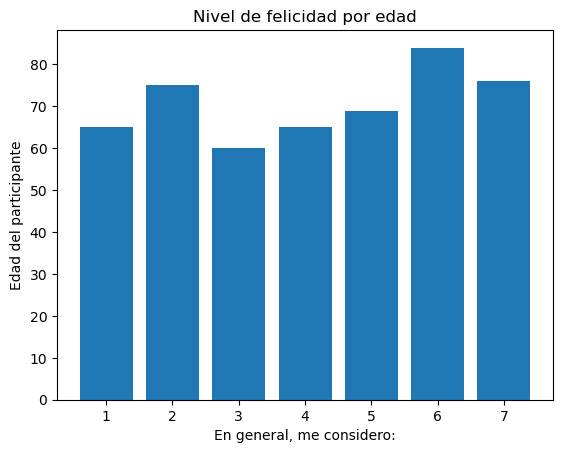

In [40]:
plt.bar(doc_rename['P1'], doc_rename['Edad'])
plt.title("Nivel de felicidad por edad")
plt.xlabel(labels['P1'])
plt.ylabel(labels['Edad'])
plt.savefig('Nivel de felicidad por edad.png')

# Objetivo del estudio

## 1. Describir la edad y el sexo de los participantes del taller.


**Nivel de Investigación:** Descriptivo

**Objetivo Estadístico:** Describir

**Variable:** Edad, Sexo

**Tipo de Variable:** Númerica, categórica

**Plan de análisis de datos:** Estadísticos descriptivos + Histograma, Tabla de frecuencia + Gráfico de barras				

Para obtener estadísticas descriptivas, el método **.describe()** permite calcular medidas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos. No obstante, si se requiere obtener resultados equivalentes a los generados por el software SPSS, es posible desarrollar una función personalizada que reciba un DataFrame y la variable de interés, permitiendo así un análisis más detallado y completo.

In [45]:
doc_rename["Edad"].describe()

count    329.000000
mean      46.647416
std       12.405140
min       19.000000
25%       37.000000
50%       46.000000
75%       56.000000
max       84.000000
Name: Edad, dtype: float64

In [46]:
def explorar_variables(data, columnas):

    resultados = {}

    for col in columnas:
        x = data[col]
        
        # Tamaño de la muestra
        n = len(x)
        
        # Estadísticos básicos
        media = np.mean(x)
        mediana = np.median(x)
        varianza = np.var(x, ddof=1)     # ddof=1 para varianza muestral
        std = np.std(x, ddof=1)
        minimo = np.min(x)
        maximo = np.max(x)
        rango = maximo - minimo
        iqr = stats.iqr(x)              # rango intercuartílico
        asimetria = stats.skew(x)
        curtosis = stats.kurtosis(x)
        
        # Media recortada al 5%
        media_recortada_5 = stats.trim_mean(x, 0.05)
        
        # Intervalo de confianza 95% para la media (suponiendo distribución ~ normal)
        sem = std / np.sqrt(n)  # error estándar
        ci_95 = stats.t.interval(0.95, n - 1, loc=media, scale=sem)
        ci_inferior, ci_superior = ci_95

        # Guardamos los resultados en un diccionario
        resultados[col] = {
            #'count': n,
            'media': media,
            'IC_95%_inf': ci_inferior,
            'IC_95%_sup': ci_superior,
            'media_recortada_5%': media_recortada_5,
            'mediana': mediana,
            'varianza': varianza,
            'desv_estandar': std,
            'minimo': minimo,
            'maximo': maximo,
            'rango': rango,
            'rango_intercuartil': iqr,
            'asimetria': asimetria,
            'curtosis': curtosis
        }
    
    # Convertimos el diccionario en un DataFrame para visualizarlo mejor
    resultados = pd.DataFrame(resultados).unstack()#.T
    return resultados

Estadísticos descriptivos

Una vez definida la función, se introduce como entrada el DataFrame junto con la variable de interés para generar el histograma correspondiente.

In [49]:
estadisticas = explorar_variables(doc_rename, ['Edad'])
estadisticas

Edad  media                  46.647416
      IC_95%_inf             45.301998
      IC_95%_sup             47.992835
      media_recortada_5%     46.535354
      mediana                46.000000
      varianza              153.887501
      desv_estandar          12.405140
      minimo                 19.000000
      maximo                 84.000000
      rango                  65.000000
      rango_intercuartil     19.000000
      asimetria               0.191060
      curtosis               -0.496226
dtype: float64

Histograma

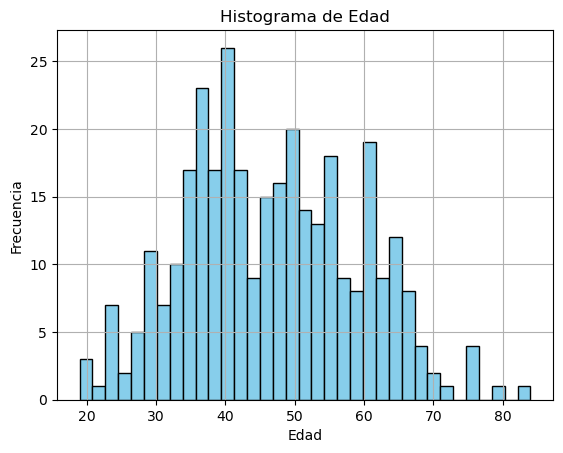

<Figure size 640x480 with 0 Axes>

In [51]:
doc_rename['Edad'].hist(bins=35, color='skyblue', edgecolor='black')
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de Edad")
plt.show()
plt.savefig('Histograma de Edad.png')

## 2. Saber cuál es el nivel de felicidad entre los asistentes del taller.


**Nivel de Investigación:** Descriptivo

**Objetivo Estadístico:** Describir

**Variable:** Total

**Tipo de Variable:** Númerica

**Plan de análisis de datos:** Estadísticos descriptivos + Histograma

total  media                 5.234043
       IC_95%_inf            5.127908
       IC_95%_sup            5.340177
       media_recortada_5%    5.257576
       mediana               5.250000
       varianza              0.957633
       desv_estandar         0.978587
       minimo                2.000000
       maximo                7.000000
       rango                 5.000000
       rango_intercuartil    1.250000
       asimetria            -0.300299
       curtosis             -0.219972
dtype: float64


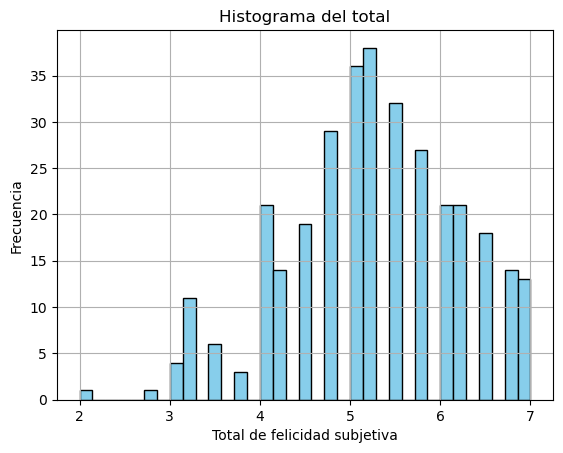

In [54]:
# ==== EJEMPLO DE USO ==== 
# Supongamos que en tu DataFrame 'doc_rename' tienes una columna 'Edad'
# que quieres explorar:
estadisticas = explorar_variables(doc_rename, ["total"])

# Muestra la tabla con las estadísticas
print(estadisticas)

# ==== HISTOGRAMA ====
# Para graficar un histograma de 'Edad' puedes hacer:
doc_rename['total'].hist(bins=35, color='skyblue', edgecolor='black')
plt.xlabel(labels['Total'])
plt.ylabel("Frecuencia")
plt.title("Histograma del total")
plt.savefig('Histograma del total.png')

## 3. Identificar si hay una relación entre la felicidad y la edad de los asistentes. 


**Nivel de Investigación:** Relacional

**Objetivo Estadístico:** Correlacional

**Variable:** Total, Edad

**Tipo de Variable:** Ambas son númerica

**Plan de análisis de datos:** Gráfico de dispersión, Coeficiente de correlación

Distribución de Participantes por Sexo

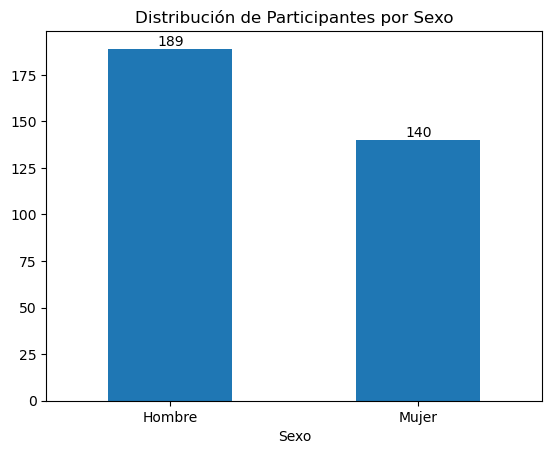

In [58]:
ax = doc_rename['Sexo'].value_counts().plot(kind='bar')
plt.title("Distribución de Participantes por Sexo")
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)
plt.savefig('Distribución de Participantes por Sexo.png')

Gráfico de dispersión

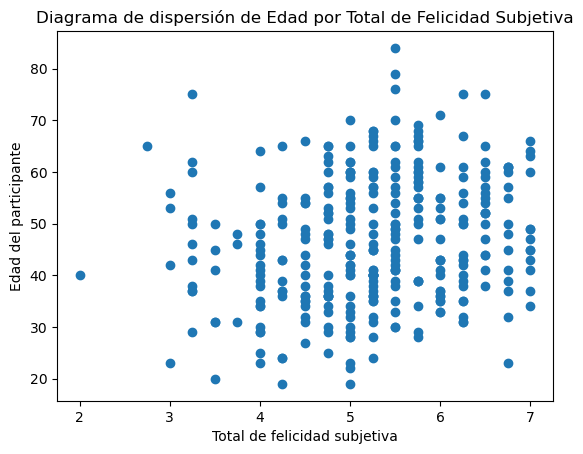

In [60]:
plt.scatter(doc_rename["total"], doc_rename["Edad"])
plt.title("Diagrama de dispersión de Edad por Total de Felicidad Subjetiva")
plt.xlabel(labels['Total'])
plt.ylabel(labels['Edad'])
plt.savefig('Diagrama de dispersión de Edad por Total de Felicidad Subjetiva.png')

Coeficiente de correlación

In [62]:
co = doc_rename[['total', 'Edad']].copy()
co
co.corr(method="spearman")

,total,Edad
total,1.00000,0.21053
Edad,0.21053,1.00000


## 4. Identificar si hay una relación entre la felicidad  y el sexo de los participantes, ver si hay  diferencias.

**Nivel de Investigación:** Relacional

**Objetivo Estadístico:** Comparar

**Variable:** Total, Sexo

**Tipo de Variable:** Númerica, Categorica

**Plan de análisis de datos:** Descriptivos, Gráfico Boxplot

In [65]:
desc_hombres = doc_rename[doc_rename['Sexo'] == 'Hombre']
desc_mujeres = doc_rename[doc_rename['Sexo'] == 'Mujer']

Total de felicidad de hombres

In [67]:
Desc_total = explorar_variables(desc_hombres,['total'])
Desc_total

total  media                 5.182540
       IC_95%_inf            5.033361
       IC_95%_sup            5.331719
       media_recortada_5%    5.204678
       mediana               5.250000
       varianza              1.080864
       desv_estandar         1.039646
       minimo                2.000000
       maximo                7.000000
       rango                 5.000000
       rango_intercuartil    1.250000
       asimetria            -0.343598
       curtosis             -0.257112
dtype: float64

Total de felicidad de muejres

In [69]:
Desc_total = explorar_variables(desc_mujeres,['total'])
Desc_total

total  media                 5.303571
       IC_95%_inf            5.155107
       IC_95%_sup            5.452036
       media_recortada_5%    5.317460
       mediana               5.250000
       varianza              0.789376
       desv_estandar         0.888468
       minimo                3.250000
       maximo                7.000000
       rango                 3.750000
       rango_intercuartil    1.250000
       asimetria            -0.116131
       curtosis             -0.485438
dtype: float64

Boxplot Distribución del total por sexo

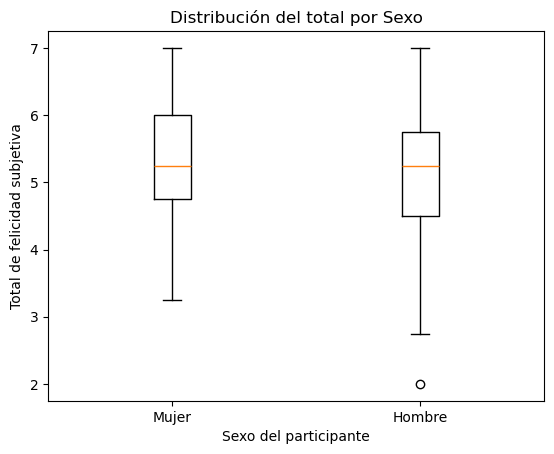

In [71]:
# Filtrar los datos por sexo
hombres = doc_rename[doc_rename['Sexo'] == 'Hombre']['total']
mujeres = doc_rename[doc_rename['Sexo'] == 'Mujer']['total']

# Crear el boxplot
plt.title('Distribución del total por Sexo')
plt.xlabel(labels['Sexo'])
plt.ylabel(labels['Total'])
plt.boxplot([mujeres, hombres], tick_labels=['Mujer', 'Hombre']); 
# ; es para omitir texto adicional en la salida
plt.savefig('Distribución del total por Sexo')